In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

In [69]:
df = pd.read_csv("bank_marketing_dataset.csv")

In [70]:
df = df[["age","job","balance","loan","contact","deposit"]]

In [71]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['age'] >= lower) & (df['age'] <= upper)]


In [72]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['balance'] >= lower) & (df['balance'] <= upper)]


In [76]:
le = LabelEncoder()
df["job"] = le.fit_transform(df["job"])
df["loan"] = le.fit_transform(df["loan"])
df["contact"] = le.fit_transform(df["contact"])
df["deposit"] = le.fit_transform(df["deposit"])

In [77]:
df.shape

(9954, 6)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [16]:
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion= "entropy"
)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
y_pred = classifier.predict(x_test)

In [20]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy score:",accuracy)

Accuracy score: 0.6032243618450515


<Axes: ylabel='age'>

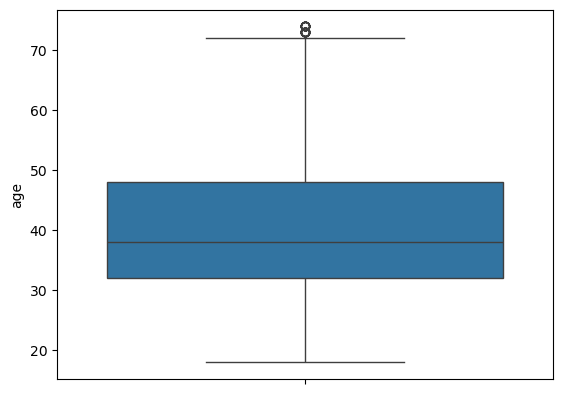

In [64]:
sns.boxplot(df["age"])

<Axes: ylabel='balance'>

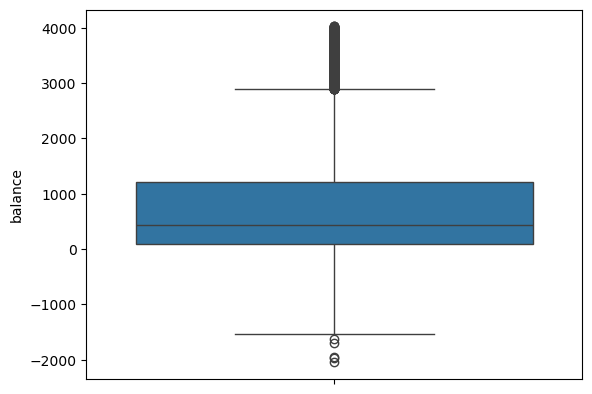

In [66]:
sns.boxplot(df["balance"])

In [26]:
df.head()

,age,job,balance,loan,contact,deposit
0,59,0,2343,0,2,1
1,56,0,45,0,2,1
2,41,9,1270,0,2,1
3,55,7,2476,0,2,1
4,54,0,184,0,2,1


In [28]:
df.shape

(9954, 6)

DecisionTreeClassifier(criterion='entropy')

Accuracy score: 0.6022099447513812


In [36]:
df_ri = df.reset_index(drop=True)

In [49]:

df = pd.get_dummies(
    df,
    columns=['job', 'loan', 'contact'],
    drop_first=True
)


In [50]:
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})


In [51]:
df

,age,balance,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_yes,contact_telephone,contact_unknown
0,59,2343,1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,56,45,1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,41,1270,1,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,55,2476,1,False,False,False,False,False,False,True,False,False,False,False,False,False,True
4,54,184,1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
11158,39,733,0,False,False,False,False,False,False,True,False,False,False,False,False,False,True
11159,32,29,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False
11160,43,0,0,False,False,False,False,False,False,False,False,True,False,False,True,False,False


In [54]:
df.head()

,age,balance,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_yes,contact_telephone,contact_unknown
0,59,2343,1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,56,45,1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,41,1270,1,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,55,2476,1,False,False,False,False,False,False,True,False,False,False,False,False,False,True
4,54,184,1,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [55]:
df.shape

(9954, 17)

In [58]:
x = df.drop("deposit",axis =1)
y = df["deposit"]

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [60]:
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [61]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion= "entropy"
)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [62]:
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy score:",accuracy)

Accuracy score: 0.5946760421898544


[[667 395]
 [412 517]]


<Axes: >

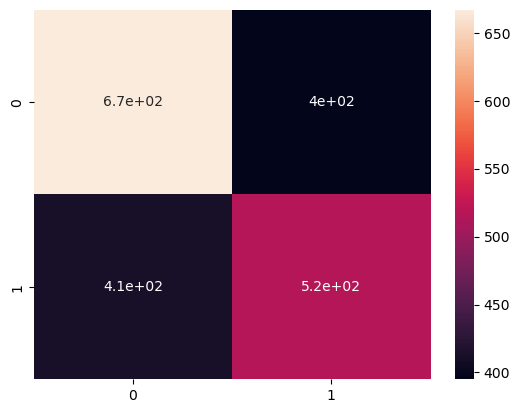

In [63]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)